In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/random-linear-regression/test.csv
/kaggle/input/random-linear-regression/train.csv


Resources --
* https://github.com/dibgerge/ml-coursera-python-assignments
* https://github.com/kaleko/CourseraML

In [2]:
train = pd.read_csv(r'/kaggle/input/random-linear-regression/train.csv', encoding='iso-8859-1')
test = pd.read_csv(r'/kaggle/input/random-linear-regression/test.csv', encoding='iso-8859-1')


In [3]:
train.head(2)

,x,y
0,24.0,21.549452
1,50.0,47.464463


In [4]:
test.head(2)

,x,y
0,77,79.775152
1,21,23.177279


**Plotting the data using Bokeh**

In [5]:
from bokeh.plotting import *
from bokeh.models import *
from bokeh.layouts import *
from bokeh.io import *
from bokeh.embed import *
from bokeh.resources import *
import pandas as pd


def bokeh_regg_plot(x,y):
    output_notebook()
    df = pd.DataFrame(list(zip(x, y)),columns =['X','Y']) 
    source = ColumnDataSource(data=df)
    regg_plot = figure(plot_width=800,plot_height=400,title="Regression Plot")
    regg_plot.circle(x, y)   
    html_name = 'regression.html'
    output_file(html_name,mode='inline')
    show(regg_plot)
    save(regg_plot)

In [6]:
bokeh_regg_plot(train['x'],train['y'])

Loading BokehJS ...

In [7]:
#Length of training data 
m = train['x'].size
print(m)

700


In [8]:
one=np.ones((m,1))

In [9]:
#Join the one vector and the train dataset to form X Matrix
X = np.hstack((one, train['x'][:,np.newaxis]))
print("X Original Shape = {}".format(X.shape))
Y = train['y'].to_numpy()
print("Y Original Shape = {}".format(Y.shape))
Y = Y[:,np.newaxis]
print("Y Modified Shape = {}".format(Y.shape))


X Original Shape = (700, 2)
Y Original Shape = (700,)
Y Modified Shape = (700, 1)


In [10]:
#Initialize theta vector 
theta = np.random.rand(2, 1)
print(theta.shape)

(2, 1)


In [11]:
#h(theta) = X*theta = (m,1) hypothesis matrix
#hypo will be caluculated for every iteration of gradient descent to optimize the cost
def h(theta,X): #Linear hypothesis function
    hypo = np.nan_to_num(np.dot(X,theta))
#     print("Hypothesis Matrix Shape = {}".format(hypo.shape))
    return hypo

In [12]:
h(theta,X)

array([[  3.02513058],
       [  5.38459392],
       [  2.20839326],
       [  4.29561084],
       [  8.74229176],
       [  4.11411366],
       [  1.93614749],
       [  8.19780021],
       [  3.11587917],
       [  1.30090736],
       [  2.29914185],
       [  2.29914185],
       [  3.02513058],
       [  4.38635943],
       [  5.74758828],
       [  6.29207982],
       [  3.20662776],
       [  7.47181149],
       [  3.47887353],
       [  3.66037071],
       [  7.01806854],
       [  8.74229176],
       [  6.11058264],
       [  5.74758828],
       [  8.47004598],
       [  6.11058264],
       [  5.29384533],
       [  2.66213622],
       [  9.01453753],
       [  5.20309674],
       [  1.21015877],
       [  3.11587917],
       [  4.6586052 ],
       [  0.84716441],
       [  6.29207982],
       [  9.2867833 ],
       [  4.38635943],
       [  1.48240454],
       [  2.75288481],
       [  7.01806854],
       [  8.47004598],
       [  0.84716441],
       [  6.11058264],
       [  2

Least Square Cost Function
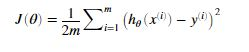

Hypothesis 
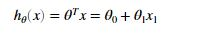

Gradient Descent
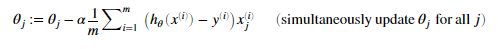

In [13]:
def compute_cost(X,y,mytheta):
    
#     return float((1/(2*m)) * np.nan_to_num(np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y))))

    m= len(X[0])
#     print('m = {}'.format(m))
    
    hypo = h(mytheta,X)
    
    diff  = hypo - y
#     print("Diff Matrix Shape = {}".format(diff.shape))

    power = np.power(diff, 2)
#     print("Power Matrix Shape = {}".format(power.shape))

    cost =  (np.nansum(power)/(2*m))
#     print("Cost = {}".format(cost))

    return cost

In [14]:
def gradientDescent(X, y, theta, alpha, iterations):
#     for _ in range(iterations):
#         hypo = np.nan_to_num(np.dot(X,theta))
#         temp = hypo - y
        
#         temp = np.nansum(np.multiply(temp,X))
#         theta = theta - (alpha/m) * temp
#     return theta
    
    for i in range(iterations):
        tmptheta = theta
        for j in range(len(tmptheta)):
            temp = h(tmptheta,X) - y
            temp = np.nansum(np.multiply(temp,X))
            tmptheta[j] = theta[j] - np.multiply((alpha/m),temp)
        theta = tmptheta
    return theta
            
        
        
    
    
#     jvec = [] #Used to plot cost as function of iteration
#     thetahistory = [] #Used to visualize the minimization path later on
#     for meaninglessvariable in range(iterations):
#         tmptheta = theta
#         jvec.append(compute_cost(X,y,theta))
#         # Buggy line
#         #thetahistory.append(list(tmptheta))
#         # Fixed line
#         thetahistory.append(list(theta[:,0]))
#         #Simultaneously updating theta values
#         for j in range(len(tmptheta)):
#             tmptheta[j] = theta[j] - (alpha/m)*np.nansum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
#         theta = tmptheta
#     return theta, thetahistory, jvec


In [15]:
J = compute_cost(X,train['y'][:,np.newaxis],theta)
print(J)

469385.88705722743


In [16]:
iterations = 1500
alpha = 0.01
theta= gradientDescent(X, Y, theta, alpha, iterations)
print(theta)

[[-inf]
 [ inf]]


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in multiply
  


In [17]:
from bokeh.plotting import *
from bokeh.models import *
from bokeh.layouts import *
from bokeh.io import *
from bokeh.embed import *
from bokeh.resources import *
import pandas as pd


def bokeh_regg_hypo_plot(x,y,X,theta):
    output_notebook()
    df = pd.DataFrame(list(zip(x, y)),columns =['X','Y']) 
    source = ColumnDataSource(data=df)
    regg_plot = figure(plot_width=800,plot_height=400,title="Regression Plot")
    regg_plot.circle(x, y) 
    html_name = 'regression.html'
    output_file(html_name,mode='inline')
    show(regg_plot)
    save(regg_plot)
    hypo_plot = figure(plot_width=regg_plot.plot_width,plot_height=regg_plot.plot_height,title="Hypothesis Plot")
    hypo_plot.line([X[:,1],y=np.nan_to_num(np.dot(X, theta)))
    html_name = 'hypothesis.html'
    output_file(html_name,mode='inline')
    show(hypo_plot)
    save(hypo_plot)

   

SyntaxError: invalid syntax (<ipython-input-17-02e350e08c7f>, line 21)

In [18]:
bokeh_regg_hypo_plot(train['x'],train['y'],X,theta)

NameError: name 'bokeh_regg_hypo_plot' is not defined